In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Intersubject classification

In [14]:
with open('../dicts_results/inter_subject_classification/braccio_cassical.pkl', 'rb') as f:
    dict_intersubject_classical = pickle.load(f)

with open('../dicts_results/inter_subject_classification/braccio_eegnet_F1_4_F2_16_D_2.pkl', 'rb') as f:
    dict_intersubject_eegnet = pickle.load(f)

with open('../dicts_results/inter_subject_classification/braccio_atcnet_numwin_5_filtersize_250.pkl', 'rb') as f:
    dict_intersubject_atcnet = pickle.load(f)

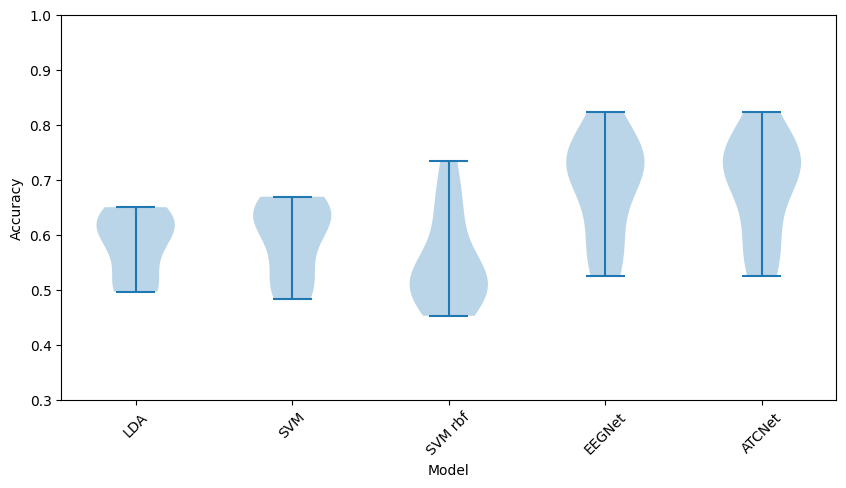

In [15]:
# print violin plot of the results with seaborn
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.3, 1)
plt.xticks(rotation=45)
plt.violinplot([dict_intersubject_classical["lda_balanced_accuracy"], dict_intersubject_classical["svm_balanced_accuracy"], dict_intersubject_classical["svm_rbf_balanced_accuracy"], dict_intersubject_eegnet['test_balanced_accuracy'], dict_intersubject_atcnet['test_balanced_accuracy']])
plt.xticks([1, 2, 3, 4, 5], ['LDA', 'SVM', 'SVM rbf', 'EEGNet', 'ATCNet'])
plt.savefig('../plots/inter_subject_classification/braccio_violinplot.png')
plt.show()

# Intra-subject classification with runs

In [16]:
with open('../dicts_results/intra_subject_classification/braccio_runs_classical.pkl', 'rb') as f:
    dict_intrasubject_runs_classical = pickle.load(f)

with open('../dicts_results/intra_subject_classification/braccio_runs_eegnet_F1_4_F2_16_D_2.pkl', 'rb') as f:
    dict_intrasubject_runs_eegnet = pickle.load(f)

with open('../dicts_results/intra_subject_classification/braccio_runs_atcnet_numwins_5_filtersize_250.pkl', 'rb') as f:
    dict_intrasubject_runs_atcnet = pickle.load(f)

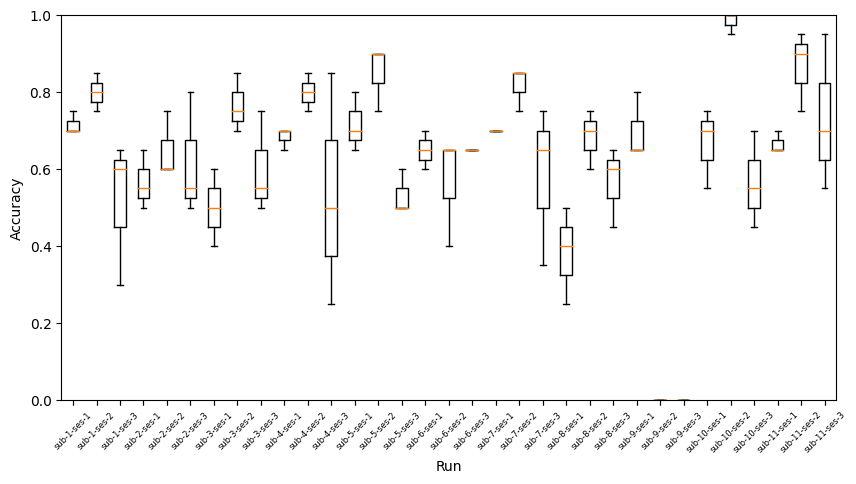

In [17]:
# plot the results of the intra-subject classification
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.xlabel('Run')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.xticks(list(range(1,34)), ["sub-{}-ses-{}".format(i, j) for i in range(1, 12) for j in range(1, 4)], fontsize=6)
plt.boxplot([dict_intrasubject_runs_eegnet['test_balanced_accuracy'][i,j,:] for i in range(11) for j in range(3)],labels=["sub-{}-ses-{}".format(i, j) for i in range(1, 12) for j in range(1, 4)], showfliers=False)
plt.savefig('../plots/intra_subject_classification/braccio_eegnet_runs_variance.png')
plt.show()

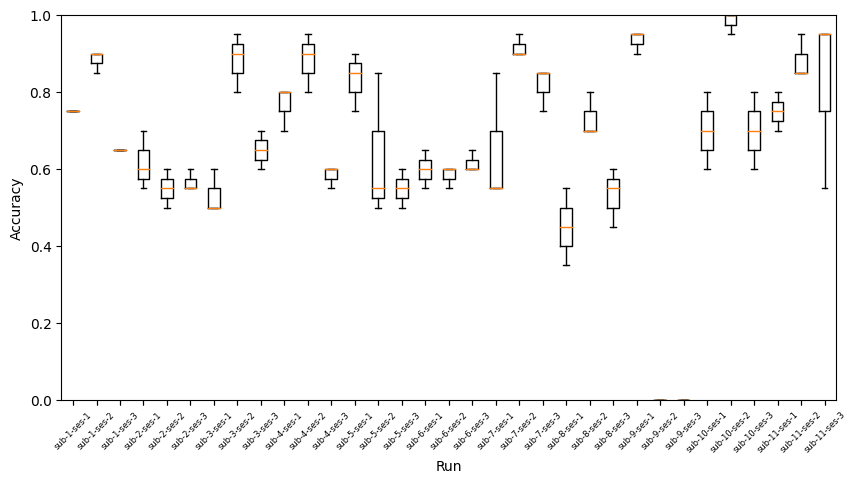

In [18]:
# plot the results of the intra-subject classification
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.xlabel('Run')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.xticks(list(range(1,34)), ["sub-{}-ses-{}".format(i, j) for i in range(1, 12) for j in range(1, 4)], fontsize=6)
plt.boxplot([dict_intrasubject_runs_atcnet['test_balanced_accuracy'][i,j,:] for i in range(11) for j in range(3)],labels=["sub-{}-ses-{}".format(i, j) for i in range(1, 12) for j in range(1, 4)], showfliers=False)
plt.savefig('../plots/intra_subject_classification/braccio_atcnet_runs_variance.png')
plt.show()

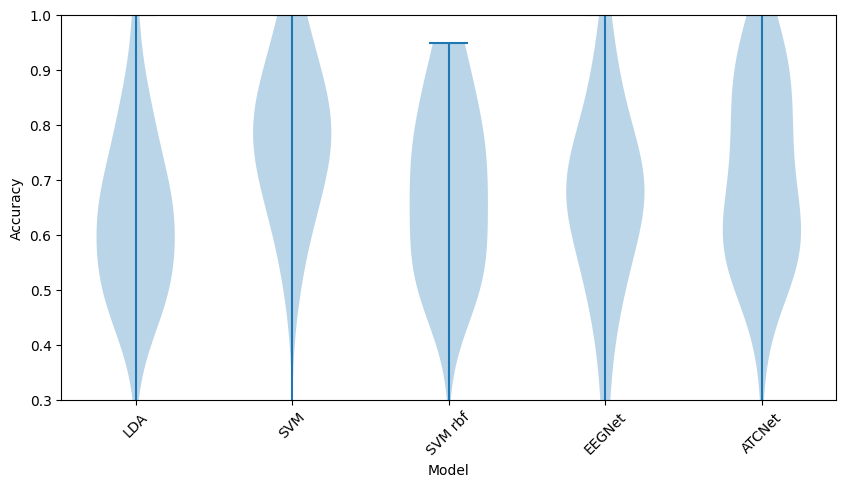

In [19]:
# print violin plot of the results with seaborn
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.3, 1)
plt.xticks(rotation=45)
plt.violinplot([dict_intrasubject_runs_classical["lda_balanced_accuracy"].reshape(-1), dict_intrasubject_runs_classical["svm_balanced_accuracy"].reshape(-1), dict_intrasubject_runs_classical["svm_rbf_balanced_accuracy"].reshape(-1), dict_intrasubject_runs_eegnet['test_balanced_accuracy'].reshape(-1), dict_intrasubject_runs_atcnet['test_balanced_accuracy'].reshape(-1)])
plt.xticks([1, 2, 3, 4, 5], ['LDA', 'SVM', 'SVM rbf', 'EEGNet', 'ATCNet'])
plt.savefig('../plots/intra_subject_classification/braccio_runs_violinplot.png')
plt.show()

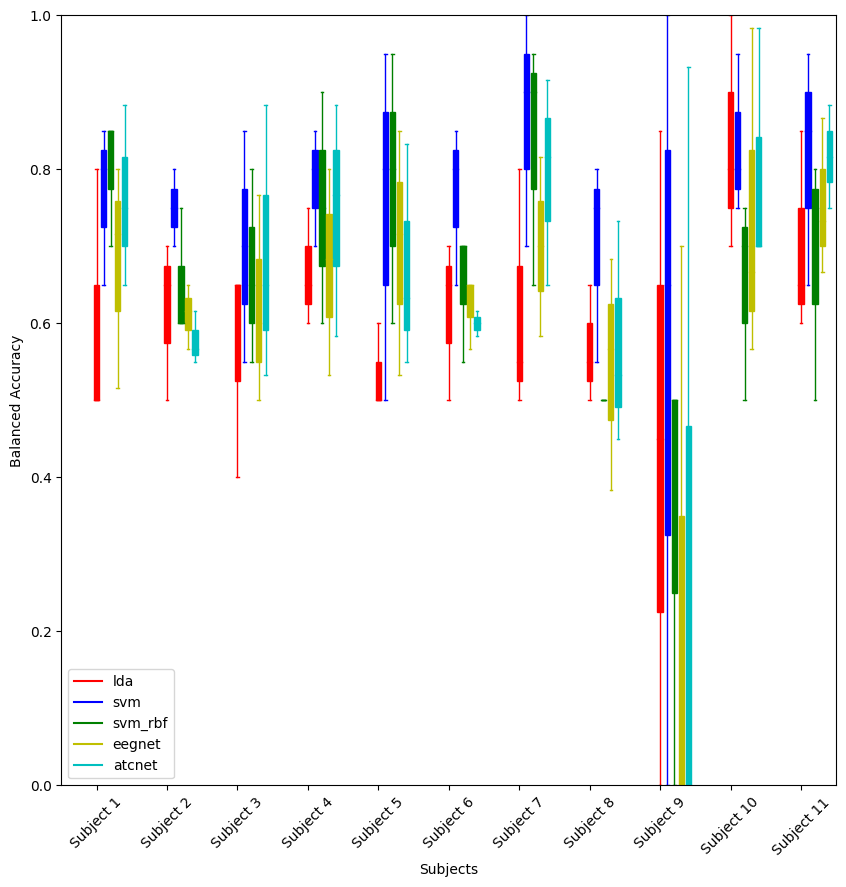

In [34]:
# Sample data initialization (adjust to match your actual data)
acc_subject = np.zeros((11, 3, 5))  # Shape: (11 subjects, 3 trials, 5 models)
acc_subject[:, :, 0] = dict_intrasubject_runs_classical["lda_balanced_accuracy"].reshape(11, 3)
acc_subject[:, :, 1] = dict_intrasubject_runs_classical["svm_balanced_accuracy"].reshape(11, 3)
acc_subject[:, :, 2] = dict_intrasubject_runs_classical["svm_rbf_balanced_accuracy"].reshape(11, 3)
acc_subject[:, :, 3] = np.mean(dict_intrasubject_runs_eegnet['test_balanced_accuracy'], axis=-1).reshape(11, 3)
acc_subject[:, :, 4] = np.mean(dict_intrasubject_runs_atcnet['test_balanced_accuracy'], axis=-1).reshape(11, 3)

# Define tick labels
ticks = ['lda', 'svm', 'svm_rbf', 'eegnet', 'atcnet']

# Define positions for each group
positions = [np.arange(acc_subject.shape[0]) * 2.0 + i * 0.2 for i in range(5)]

# Plotting each group
colors = ['r', 'b', 'g', 'y', 'c']
labels = ['lda', 'svm', 'svm_rbf', 'eegnet', 'atcnet']
plots = []

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()

plt.figure(figsize=(10, 10))

for i in range(5):
    plot = plt.boxplot(acc_subject[:, :, i].T, positions=positions[i], widths=0.15, patch_artist=True)
    define_box_properties(plot, colors[i], labels[i])
    plots.append(plot)

# Set x-ticks, limits, and labels
plt.xticks(rotation=45)
plt.xticks(np.arange(0, acc_subject.shape[0] * 2, 2), [f'Subject {i+1}' for i in range(acc_subject.shape[0])])
plt.xlim(-1, acc_subject.shape[0] * 2 - 1)
plt.ylim(0, 1)

# Add the overall plot labels and title
plt.xlabel('Subjects')
plt.ylabel('Balanced Accuracy')

# Show the legend
plt.legend()
plt.savefig('../plots/intra_subject_classification/braccio_runs_per_subject.png')
# Show the plot
plt.show()



## Intra-subject classification with sessions

In [21]:
with open('../dicts_results/intra_subject_classification/braccio_sessions_classical.pkl', 'rb') as f:
    dict_intrasubject_sessions_classical = pickle.load(f)

with open('../dicts_results/intra_subject_classification/braccio_sessions_eegnet_F1_4_F2_16_D_2.pkl', 'rb') as f:
    dict_intrasubject_sessions_eegnet = pickle.load(f)

with open('../dicts_results/intra_subject_classification/braccio_sessions_atcnet_numwin_5_filtersize_250.pkl', 'rb') as f:
    dict_intrasubject_sessions_atcnet = pickle.load(f)

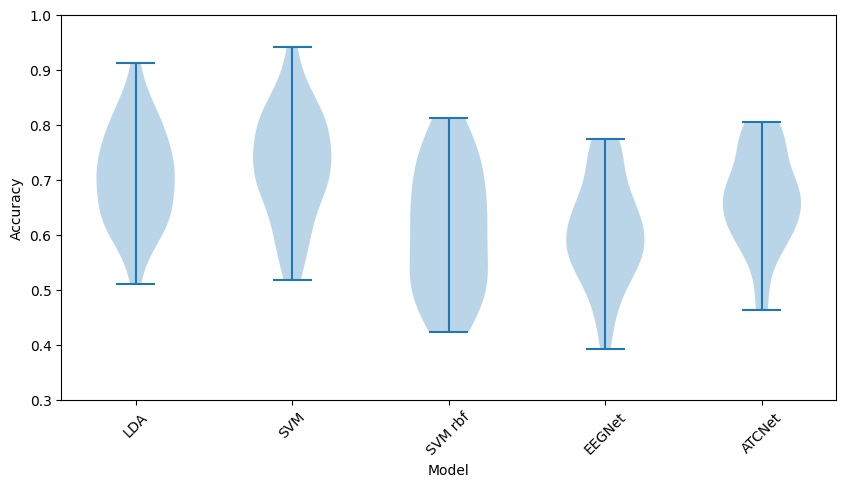

In [22]:
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.3, 1)
plt.xticks(rotation=45)
plt.violinplot([dict_intrasubject_sessions_classical["lda_balanced_accuracy"].reshape(-1), dict_intrasubject_sessions_classical["svm_balanced_accuracy"].reshape(-1), dict_intrasubject_sessions_classical["svm_rbf_balanced_accuracy"].reshape(-1), dict_intrasubject_sessions_eegnet['test_balanced_accuracy'].reshape(-1), dict_intrasubject_sessions_atcnet['test_balanced_accuracy'].reshape(-1)])
plt.xticks([1, 2, 3, 4, 5], ['LDA', 'SVM', 'SVM rbf', 'EEGNet', 'ATCNet'])
plt.savefig('../plots/intra_subject_classification/braccio_sessions_violinplot.png')
plt.show()

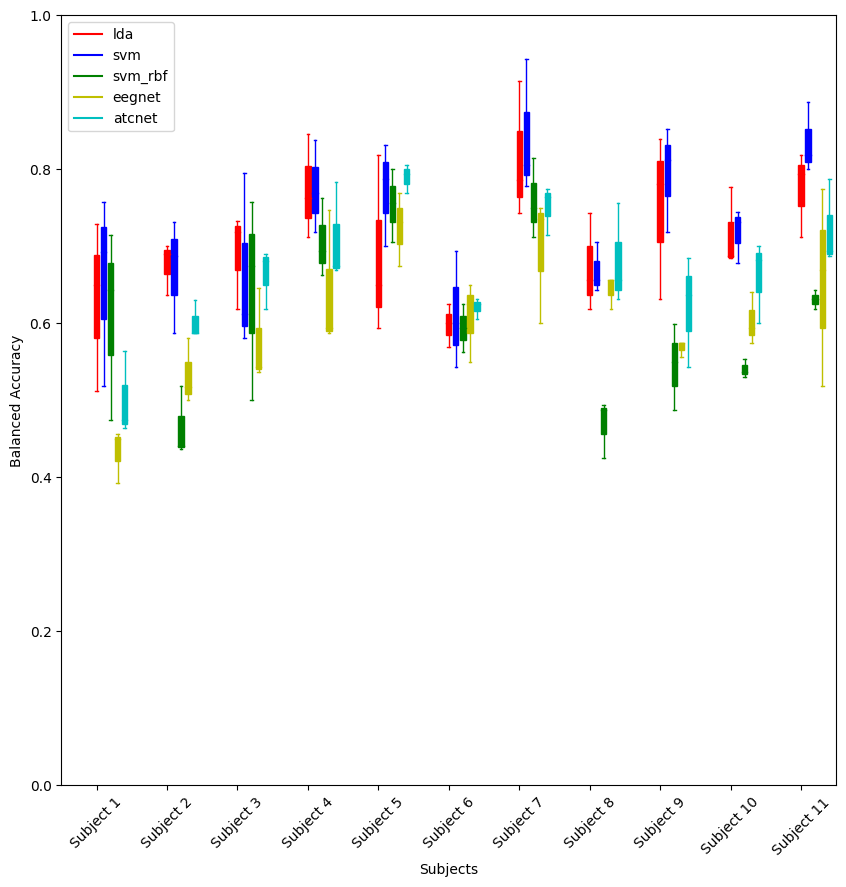

In [33]:
# Sample data initialization (adjust to match your actual data)
acc_subject = np.zeros((11, 3, 5))  # Shape: (11 subjects, 3 trials, 5 models)
acc_subject[:, :, 0] = dict_intrasubject_sessions_classical["lda_balanced_accuracy"].reshape(11, 3)
acc_subject[:, :, 1] = dict_intrasubject_sessions_classical["svm_balanced_accuracy"].reshape(11, 3)
acc_subject[:, :, 2] = dict_intrasubject_sessions_classical["svm_rbf_balanced_accuracy"].reshape(11, 3)
acc_subject[:, :, 3] = dict_intrasubject_sessions_eegnet['test_balanced_accuracy'].reshape(11, 3)
acc_subject[:, :, 4] = dict_intrasubject_sessions_atcnet['test_balanced_accuracy'].reshape(11, 3)

# Define tick labels
ticks = ['lda', 'svm', 'svm_rbf', 'eegnet', 'atcnet']

# Define positions for each group
positions = [np.arange(acc_subject.shape[0]) * 2.0 + i * 0.2 for i in range(5)]

# Plotting each group
colors = ['r', 'b', 'g', 'y', 'c']
labels = ['lda', 'svm', 'svm_rbf', 'eegnet', 'atcnet']
plots = []

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()

plt.figure(figsize=(10, 10))

for i in range(5):
    plot = plt.boxplot(acc_subject[:, :, i].T, positions=positions[i], widths=0.15, patch_artist=True)
    define_box_properties(plot, colors[i], labels[i])
    plots.append(plot)

# Set x-ticks, limits, and labels
plt.xticks(rotation=45)
plt.xticks(np.arange(0, acc_subject.shape[0] * 2, 2), [f'Subject {i+1}' for i in range(acc_subject.shape[0])])
plt.xlim(-1, acc_subject.shape[0] * 2 - 1)
plt.ylim(0, 1)

# Add the overall plot labels and title
plt.xlabel('Subjects')
plt.ylabel('Balanced Accuracy')

# Show the legend
plt.legend()
plt.savefig('../plots/intra_subject_classification/braccio_sessions_per_subject.png')
# Show the plot
plt.show()

## Intra-subject classification with sessions with transfer

In [24]:
with open('../dicts_results/intra_subject_classification_transfer/braccio_transfer_eegnet_sessions_all_F1_4_F2_16_D_2.pkl', 'rb') as f:
    dict_intrasubject_transfer_sessions_eegnet_all = pickle.load(f)

with open('../dicts_results/intra_subject_classification_transfer/braccio_transfer_eegnet_sessions_head_F1_4_F2_16_D_2.pkl', 'rb') as f:
    dict_intrasubject_transfer_sessions_eegnet_head = pickle.load(f)

with open('../dicts_results/intra_subject_classification_transfer/braccio_sessions_transfer_all_atcnet_numwin_5_filtersize_250.pkl', 'rb') as f:
    dict_intrasubject_transfer_sessions_atcnet_all = pickle.load(f)

with open('../dicts_results/intra_subject_classification_transfer/braccio_sessions_transfer_head_atcnet_numwin_5_filtersize_250.pkl', 'rb') as f:
    dict_intrasubject_transfer_sessions_atcnet_head = pickle.load(f)

IndexError: list index out of range

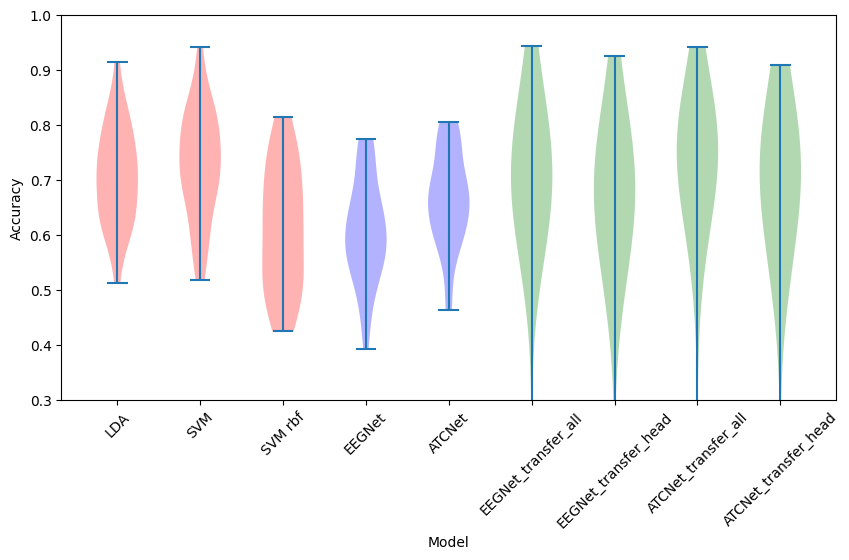

In [25]:
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.3, 1)
plt.xticks(rotation=45)
plt.violinplot([dict_intrasubject_sessions_classical["lda_balanced_accuracy"].reshape(-1), dict_intrasubject_sessions_classical["svm_balanced_accuracy"].reshape(-1), dict_intrasubject_sessions_classical["svm_rbf_balanced_accuracy"].reshape(-1), dict_intrasubject_sessions_eegnet['test_balanced_accuracy'].reshape(-1), dict_intrasubject_sessions_atcnet['test_balanced_accuracy'].reshape(-1), dict_intrasubject_transfer_sessions_eegnet_all['test_balanced_accuracy'].reshape(-1), dict_intrasubject_transfer_sessions_eegnet_head['test_balanced_accuracy'].reshape(-1), dict_intrasubject_transfer_sessions_atcnet_all['test_balanced_accuracy'].reshape(-1), dict_intrasubject_transfer_sessions_atcnet_head['test_balanced_accuracy'].reshape(-1)])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['LDA', 'SVM', 'SVM rbf', 'EEGNet', 'ATCNet', 'EEGNet_transfer_all', 'EEGNet_transfer_head', 'ATCNet_transfer_all', 'ATCNet_transfer_head'])
# add colors
colors = ['r', 'r', 'r', 'b', 'b', 'g', 'g', 'g', 'g', 'g']
for i, pc in enumerate(plt.gca().collections):
    pc.set_facecolor(colors[i])
plt.savefig('../plots/intra_subject_classification_transfer/braccio_sessions_violinplot.png')
plt.show()

## Intra-subject classification with runs with transfer

In [26]:
with open('../dicts_results/intra_subject_classification_transfer/braccio_transfer_eegnet_runs_all_F1_4_F2_16_D_2.pkl', 'rb') as f:
    dict_intrasubject_transfer_runs_eegnet_all = pickle.load(f)

with open('../dicts_results/intra_subject_classification_transfer/braccio_transfer_eegnet_runs_head_F1_4_F2_16_D_2.pkl', 'rb') as f:
    dict_intrasubject_transfer_runs_eegnet_head = pickle.load(f)

with open('../dicts_results/intra_subject_classification_transfer/braccio_runs_transfer_all_atcnet_numwin_5_filtersize_250.pkl', 'rb') as f:
    dict_intrasubject_transfer_runs_atcnet_all = pickle.load(f)

with open('../dicts_results/intra_subject_classification_transfer/braccio_runs_transfer_head_atcnet_numwin_5_filtersize_250.pkl', 'rb') as f:
    dict_intrasubject_transfer_runs_atcnet_head = pickle.load(f)

IndexError: list index out of range

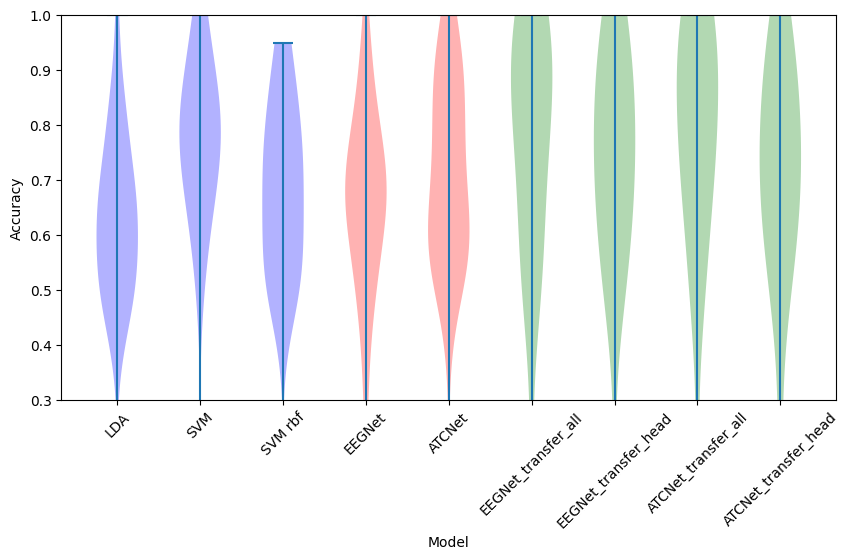

In [27]:
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.3, 1)
plt.xticks(rotation=45)
plt.violinplot([dict_intrasubject_runs_classical["lda_balanced_accuracy"].reshape(-1), dict_intrasubject_runs_classical["svm_balanced_accuracy"].reshape(-1), dict_intrasubject_runs_classical["svm_rbf_balanced_accuracy"].reshape(-1), dict_intrasubject_runs_eegnet['test_balanced_accuracy'].reshape(-1), dict_intrasubject_runs_atcnet['test_balanced_accuracy'].reshape(-1), dict_intrasubject_transfer_runs_eegnet_all['test_balanced_accuracy'].reshape(-1), dict_intrasubject_transfer_runs_eegnet_head['test_balanced_accuracy'].reshape(-1), dict_intrasubject_transfer_runs_atcnet_all['test_balanced_accuracy'].reshape(-1), dict_intrasubject_transfer_runs_atcnet_head['test_balanced_accuracy'].reshape(-1)])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['LDA', 'SVM', 'SVM rbf', 'EEGNet', 'ATCNet', 'EEGNet_transfer_all', 'EEGNet_transfer_head', 'ATCNet_transfer_all', 'ATCNet_transfer_head'])
# add colors
colors = ['b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g']
for i, pc in enumerate(plt.gca().collections):
    pc.set_facecolor(colors[i])
plt.savefig('../plots/intra_subject_classification_transfer/braccio_runs_violinplot.png')
plt.show()

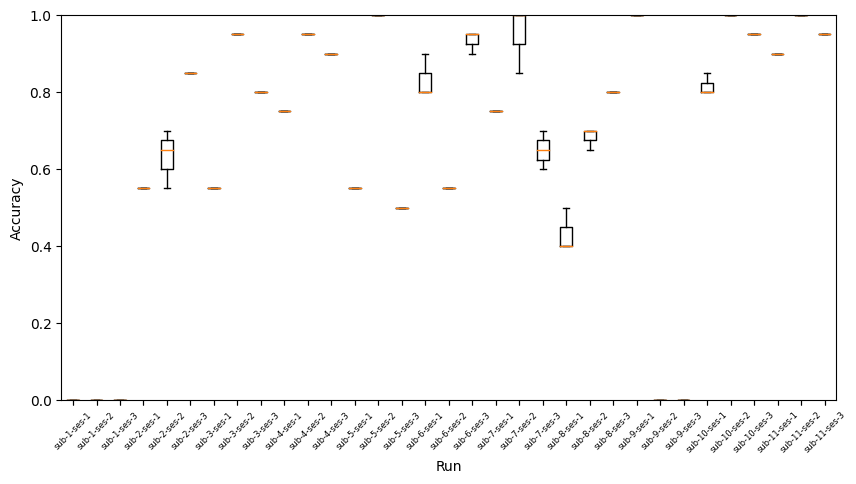

In [28]:
# plot the results of the intra-subject classification
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.xlabel('Run')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.xticks(list(range(1,34)), ["sub-{}-ses-{}".format(i, j) for i in range(1, 12) for j in range(1, 4)], fontsize=6)
plt.boxplot([dict_intrasubject_transfer_runs_eegnet_all['test_balanced_accuracy'][i,j,:] for i in range(11) for j in range(3)],labels=["sub-{}-ses-{}".format(i, j) for i in range(1, 12) for j in range(1, 4)], showfliers=False)
plt.savefig('../plots/intra_subject_classification_transfer/braccio_eegnet_all_runs_variance.png')
plt.show()

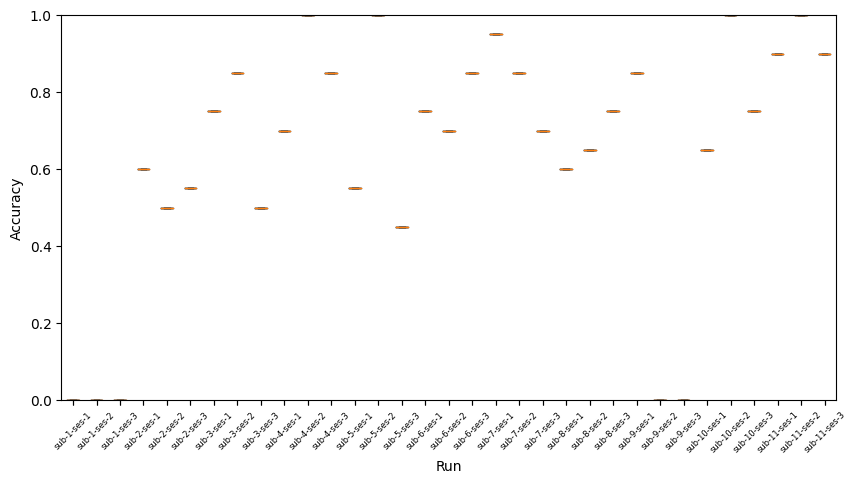

In [29]:
# plot the results of the intra-subject classification
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.xlabel('Run')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.xticks(list(range(1,34)), ["sub-{}-ses-{}".format(i, j) for i in range(1, 12) for j in range(1, 4)], fontsize=6)
plt.boxplot([dict_intrasubject_transfer_runs_eegnet_head['test_balanced_accuracy'][i,j,:] for i in range(11) for j in range(3)],labels=["sub-{}-ses-{}".format(i, j) for i in range(1, 12) for j in range(1, 4)], showfliers=False)
plt.savefig('../plots/intra_subject_classification_transfer/braccio_eegnet_head_runs_variance.png')
plt.show()

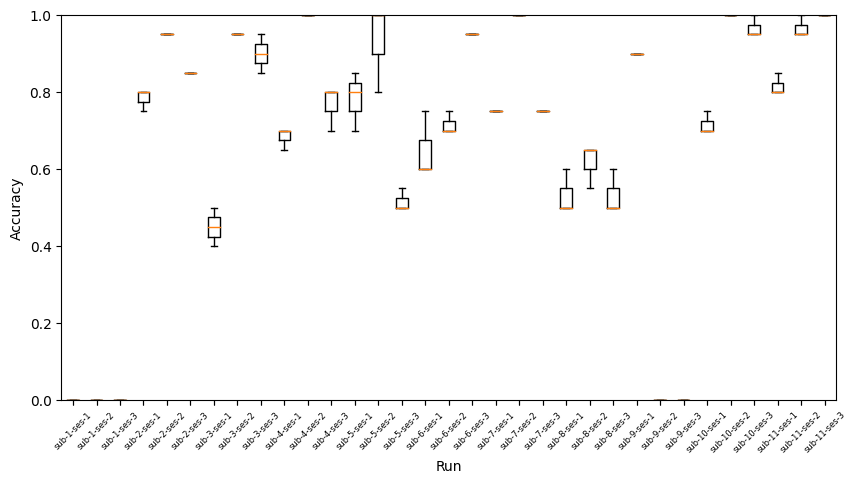

In [30]:
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.xlabel('Run')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.xticks(list(range(1,34)), ["sub-{}-ses-{}".format(i, j) for i in range(1, 12) for j in range(1, 4)], fontsize=6)
plt.boxplot([dict_intrasubject_transfer_runs_atcnet_all['test_balanced_accuracy'][i,j,:] for i in range(11) for j in range(3)],labels=["sub-{}-ses-{}".format(i, j) for i in range(1, 12) for j in range(1, 4)], showfliers=False)
plt.savefig('../plots/intra_subject_classification_transfer/braccio_atcnet_all_runs_variance.png')
plt.show()

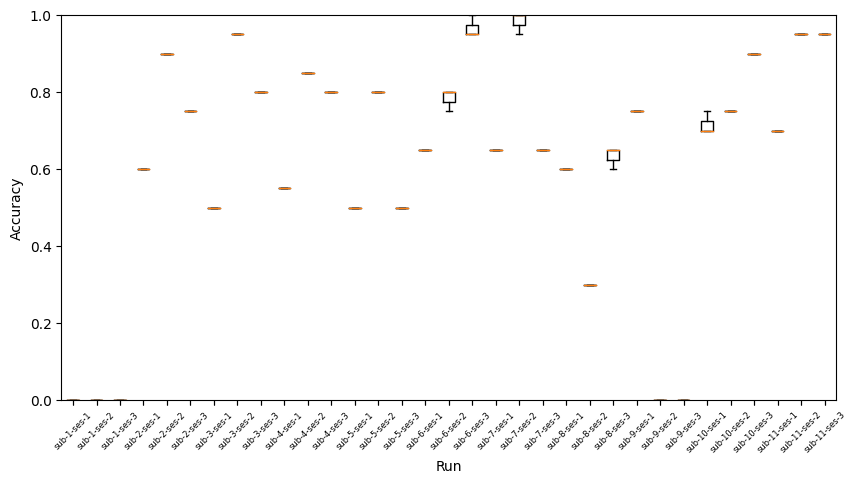

In [31]:
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.xlabel('Run')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.xticks(list(range(1,34)), ["sub-{}-ses-{}".format(i, j) for i in range(1, 12) for j in range(1, 4)], fontsize=6)
plt.boxplot([dict_intrasubject_transfer_runs_atcnet_head['test_balanced_accuracy'][i,j,:] for i in range(11) for j in range(3)],labels=["sub-{}-ses-{}".format(i, j) for i in range(1, 12) for j in range(1, 4)], showfliers=False)
plt.savefig('../plots/intra_subject_classification_transfer/braccio_atcnet_head_runs_variance.png')
plt.show()

# Generate classification results

In [32]:
# compute mean and std of the results
print("inter-subject classification")
print("classical lda mean: ", np.mean(dict_intersubject_classical["lda_balanced_accuracy"]), "std: ", np.std(dict_intersubject_classical["lda_balanced_accuracy"]))
print("classical svm mean: ", np.mean(dict_intersubject_classical["svm_balanced_accuracy"]), "std: ", np.std(dict_intersubject_classical["svm_balanced_accuracy"]))
print("classical svm rbf mean: ", np.mean(dict_intersubject_classical["svm_rbf_balanced_accuracy"]), "std: ", np.std(dict_intersubject_classical["svm_rbf_balanced_accuracy"]))
print("eegnet mean: ", np.mean(dict_intersubject_eegnet['test_balanced_accuracy']), "std: ", np.std(dict_intersubject_eegnet['test_balanced_accuracy']))
print("atcnet mean: ", np.mean(dict_intersubject_atcnet['test_balanced_accuracy']), "std: ", np.std(dict_intersubject_atcnet['test_balanced_accuracy']))

print("intra-subject classification over runs")
print("classical lda mean: ", np.mean(dict_intrasubject_runs_classical["lda_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_runs_classical["lda_balanced_accuracy"]))
print("classical svm mean: ", np.mean(dict_intrasubject_runs_classical["svm_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_runs_classical["svm_balanced_accuracy"]))
print("classical svm rbf mean: ", np.mean(dict_intrasubject_runs_classical["svm_rbf_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_runs_classical["svm_rbf_balanced_accuracy"]))
print("eegnet mean: ", np.mean(dict_intrasubject_runs_eegnet['test_balanced_accuracy']), "std: ", np.std(dict_intrasubject_runs_eegnet['test_balanced_accuracy']))
print("atcnet mean: ", np.mean(dict_intrasubject_runs_atcnet['test_balanced_accuracy']), "std: ", np.std(dict_intrasubject_runs_atcnet['test_balanced_accuracy']))

print("intra-subject classification over sessions")
print("classical lda mean: ", np.mean(dict_intrasubject_sessions_classical["lda_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_sessions_classical["lda_balanced_accuracy"]))
print("classical svm mean: ", np.mean(dict_intrasubject_sessions_classical["svm_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_sessions_classical["svm_balanced_accuracy"]))
print("classical svm rbf mean: ", np.mean(dict_intrasubject_sessions_classical["svm_rbf_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_sessions_classical["svm_rbf_balanced_accuracy"]))
print("eegnet mean: ", np.mean(dict_intrasubject_sessions_eegnet['test_balanced_accuracy']), "std: ", np.std(dict_intrasubject_sessions_eegnet['test_balanced_accuracy']))
print("atcnet mean: ", np.mean(dict_intrasubject_sessions_atcnet['test_balanced_accuracy']), "std: ", np.std(dict_intrasubject_sessions_atcnet['test_balanced_accuracy']))

print("intra-subject classification transfer over sessions")
print("eegnet all mean: ", np.mean(dict_intrasubject_transfer_sessions_eegnet_all["test_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_transfer_sessions_eegnet_all["test_balanced_accuracy"]))
print("eegnet head mean: ", np.mean(dict_intrasubject_transfer_sessions_eegnet_head["test_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_transfer_sessions_eegnet_head["test_balanced_accuracy"]))
print("atcnet all mean: ", np.mean(dict_intrasubject_transfer_sessions_atcnet_all["test_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_transfer_sessions_atcnet_all["test_balanced_accuracy"]))
print("atcnet head mean: ", np.mean(dict_intrasubject_transfer_sessions_atcnet_head["test_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_transfer_sessions_atcnet_head["test_balanced_accuracy"]))

print("intra-subject classification transfer over runs")
print("eegnet all mean: ", np.mean(dict_intrasubject_transfer_runs_eegnet_all["test_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_transfer_runs_eegnet_all["test_balanced_accuracy"]))
print("eegnet head mean: ", np.mean(dict_intrasubject_transfer_runs_eegnet_head["test_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_transfer_runs_eegnet_head["test_balanced_accuracy"]))
print("atcnet all mean: ", np.mean(dict_intrasubject_transfer_runs_atcnet_all["test_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_transfer_runs_atcnet_all["test_balanced_accuracy"]))
print("atcnet head mean: ", np.mean(dict_intrasubject_transfer_runs_atcnet_head["test_balanced_accuracy"]), "std: ", np.std(dict_intrasubject_transfer_runs_atcnet_head["test_balanced_accuracy"]))



inter-subject classification
classical lda mean:  0.5831363499148143 std:  0.05641044541649086
classical svm mean:  0.594037056088052 std:  0.06481373062044124
classical svm rbf mean:  0.5539607594309075 std:  0.08215912104973057
eegnet mean:  0.6890989363193512 std:  0.08929305453043335
atcnet mean:  0.6890989363193512 std:  0.08929305453043335
intra-subject classification over runs
classical lda mean:  0.6136363636363636 std:  0.1720080720765864
classical svm mean:  0.7530303030303029 std:  0.18171714364321154
classical svm rbf mean:  0.6636363636363636 std:  0.18310153139419144
eegnet mean:  0.6252525283230675 std:  0.2189707023953748
atcnet mean:  0.666666668472868 std:  0.22708072279065175
intra-subject classification over sessions
classical lda mean:  0.7077444401017253 std:  0.08881267896997035
classical svm mean:  0.7280556677775537 std:  0.09829631019107783
classical svm rbf mean:  0.6108583434136494 std:  0.11110946049157136
eegnet mean:  0.6075452132658525 std:  0.0928636631